## Read and extract North American Reanalysis Data

* Extracts data from .netcdf4 files and interpolates it for point locations

In [9]:
import Interpolation
import importlib
import numpy as np
importlib.reload(Interpolation)
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import time

T1 = time.time()

# for site,year in ['BB','BB2','BBS','DSM','RBM','HOGG','YOUNG']:

get = Interpolation.PointSampleNARR('BB',list(np.arange(2022,2024)))

print(time.time()-T1)

Estimating hpbl for 2022 at BB
Estimating hpbl for 2023 at BB
Write
18.70755171775818


In [4]:
get.Trace

,hpbl,hpbl_interp_linear,hpbl_interp_spline
TIMESTAMP,,,
2014-12-31 16:00:00,423.9,NaN,NaN
2014-12-31 16:30:00,409.0,NaN,NaN
2014-12-31 17:00:00,394.1,NaN,NaN
2014-12-31 17:30:00,379.2,NaN,NaN
2014-12-31 18:00:00,364.3,NaN,NaN
...,...,...,...
2023-08-31 11:00:00,222.2,NaN,NaN
2023-08-31 11:30:00,275.2,NaN,NaN
2023-08-31 12:00:00,328.2,NaN,NaN


In [35]:

T = get.Trace.copy()

T = T.resample('30T').mean()

# pri

# T = T.fillna(1)


YD = T.groupby(T.index.year).count()

YD = list(YD.loc[YD['hpbl']>365*48 - 31*48].index)

L2 = [2015,2018]

for l in L2:
    if l in YD:
        L2.remove(l)

L2

# YD
# print(365*48 - 31*48)

[2015]

In [31]:
import pandas as pd
from numpy.random import randint

df = pd.DataFrame(columns=['file','month'])

if 'afile' not in df['file']:
    print(df.shape[0])
    df.loc[df.shape[0]] = ['afile',10]
    
if 'bfile' not in df['file']:
    print(df.shape[0])
    df.loc[df.shape[0]] = ['bfile',12]

df

if 'bfile' in df['file'] and df.loc[df['file']=='bfile','month'].values[0]==12:
    print('aa')

# df = pd.DataFrame(columns=['lib', 'qty1', 'qty2'])
# for i in range(5):
#     df.loc[i] = ['name' + str(i)] + list(randint(10, size=2))

# df


0
1


In [39]:
import os
print(os.getcwd())
import sys


for p in sys.path:
    if 'Micromet.py' in p:
        root = p.split('Micromet.py')[0]+'Micromet.py'
        if root not in sys.path:
            sys.path.insert(0,root)
        break


# Root = [path for path in sys.path if 'Micromet.py' in path]

# Root

sys.path

from Biomet_Database_Functions import ReadDatabase


c:\Micromet.py\Flux_Footprint_Overlay


## Define the points and run the query

In [7]:
# df = pd.DataFrame(data = {
#     'name' : ['BBS','BB','BB2','DSM','RBM','Hogg','Young'],
#     'region' : ['BC','BC','BC','BC','BC','MB','MB'],
#     'lat' : [49.1377624,49.129344,49.119038,49.088835,49.131267,50.37055969,50.36234283],
#     'lon' : [-122.9947897,-122.984902,-122.995170,-122.895226,-123.196356,-100.5338135,-100.2024384]
#     }
# )

# df = pd.DataFrame(data = {
#     'name' : ['Hogg','Young'],
#     'lat' : [50.37055969,50.36234283],
#     'lon' : [-100.5338135,-100.2024384]
#     }
# )

	
# df.to_csv('SitePoints.csv')
df = pd.read_csv('SitePoints.csv')
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326"
)
gdf = gdf.set_index('name')
gdf
# get.estimate_values(gdf,pad = 2,freq = '30T')

,region,lat,lon,geometry
name,,,,
BBS,BC,49.137762,-122.994790,POINT (-122.99479 49.13776)
BB,BC,49.129344,-122.984902,POINT (-122.98490 49.12934)
BB2,BC,49.119038,-122.995170,POINT (-122.99517 49.11904)
DSM,BC,49.088835,-122.895226,POINT (-122.89523 49.08884)
RBM,BC,49.131267,-123.196356,POINT (-123.19636 49.13127)
Hogg,MB,50.370560,-100.533813,POINT (-100.53381 50.37056)
Young,MB,50.362343,-100.202438,POINT (-100.20244 50.36234)


In [10]:
gdf.loc['BBS']

region                                   BC
lat                               49.137762
lon                              -122.99479
geometry    POINT (-122.9947897 49.1377624)
Name: BBS, dtype: object

## Inspect the data

Text(0.5, 1.0, 'Mean Estimated PBLH by Site')

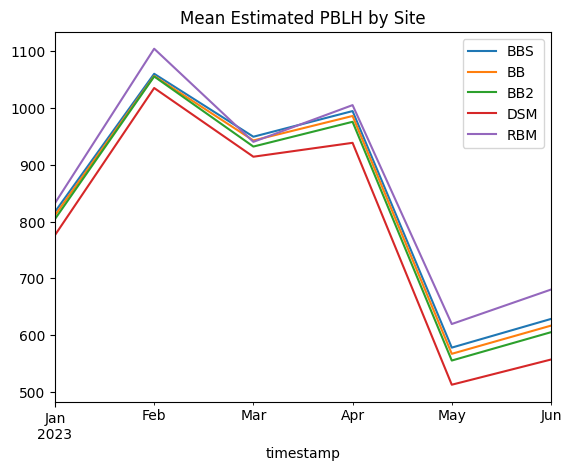

In [3]:
# Note - NARR data are in UTC 
# Annual data (for PST) include the last 8 hours of the previous year and miss the last 8 hours of the current year
fig,ax=plt.subplots()
get.TS.loc[get.TS.index.year==get.year].resample('M').mean().plot(ax=ax)
ax.set_title('Mean Estimated PBLH by Site')

2022-05-19 13:00:00
Interpolated Values
                        BBS      BB     BB2     DSM     RBM
timestamp                                                  
2022-05-19 13:00:00  1750.3  1740.6  1724.6  1694.7  1733.1
NARR Data
[[1294.5264 1200.1263  736.7264 1917.5264 1811.3264 1580.7264]
 [1450.9264 1478.3264  748.9264 1439.9264 1656.1263 1422.5264]
 [1341.1263 1388.9264  698.9264 1420.5264 1711.3264 1499.7264]
 [1458.7264 1689.9264 1775.1263 1776.1263 1764.7264 1661.7264]
 [1629.5264 1888.7264 1953.5264 1736.1263 1331.5264 1526.5264]
 [1878.7264 1907.7264 1724.1263 1167.3264 1085.7264 1195.9264]]


Text(0.5, 1.0, 'NARR grid data and RBF estimates at each point location')

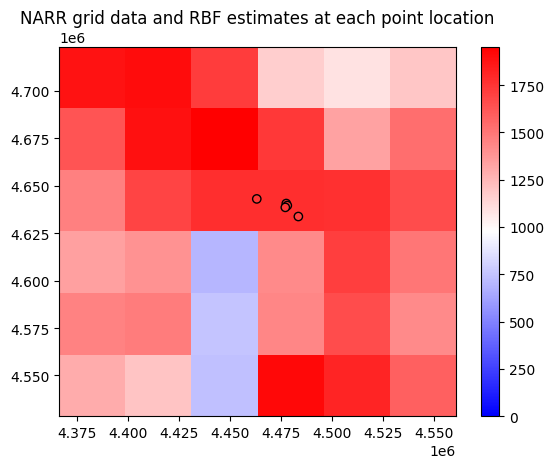

In [6]:
timestep = 1111

Time = get.time[timestep]

print(Time)

rec = get.TS.loc[get.TS.index==Time]

print('Interpolated Values')
print(rec)

print('NARR Data')
print(get.var_clip[timestep])

fig, ax = plt.subplots()

xgrid = get.xy.T.reshape(2,get.x_clip.shape[0],get.y_clip.shape[0])

vmax = get.var_clip[timestep].max()
p = ax.pcolormesh(*xgrid, get.var_clip[timestep],vmin=0, vmax=vmax, cmap='bwr')
ax.scatter(get.coords.T[0],get.coords.T[1],c=rec.values[0],vmin=0, vmax=vmax, cmap='bwr',edgecolor='k')
fig.colorbar(p)

ax.set_title('NARR grid data and RBF estimates at each point location')